In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
import warnings


# ML model : LogisticRegressionCV

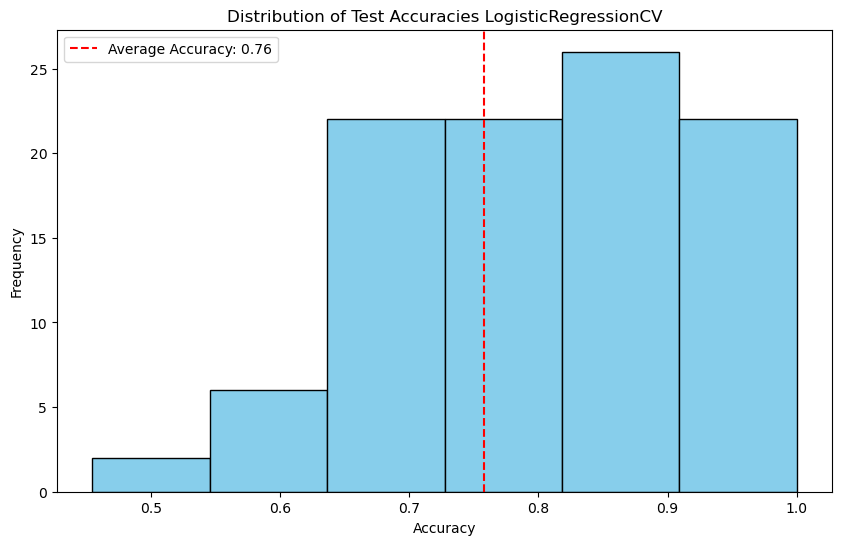

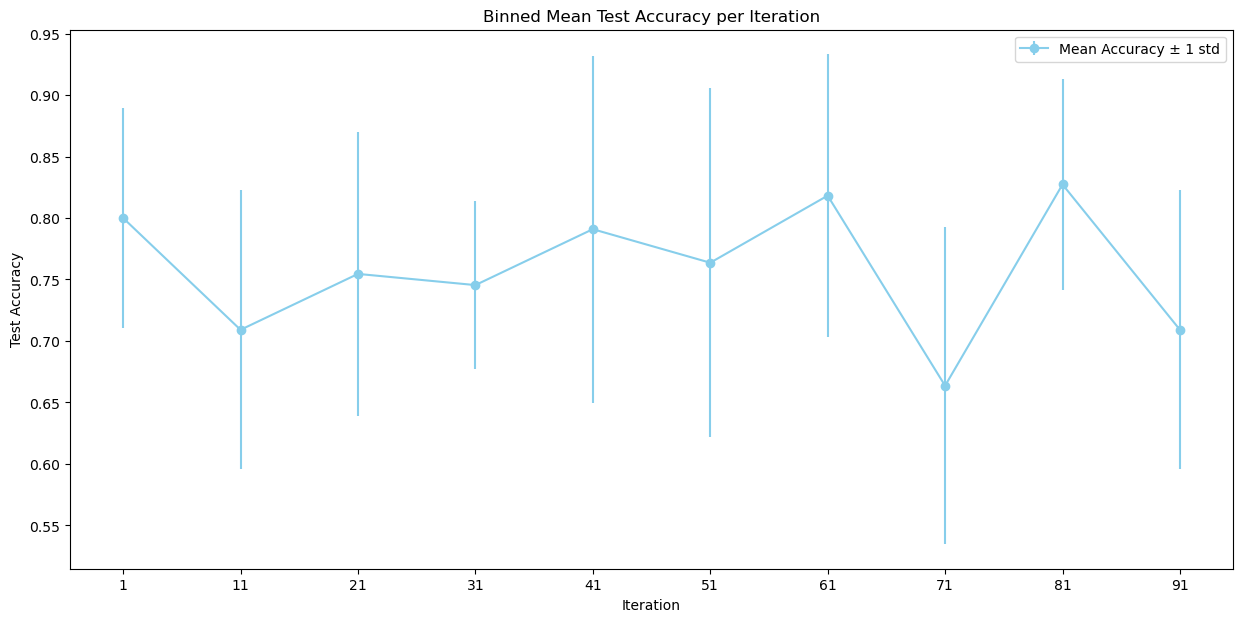

In [69]:
control_df = pd.read_csv("Control_db.csv")
dementia_df = pd.read_csv("Dementia_db.csv")

df = pd.concat([control_df, dementia_df], ignore_index=True)
test_accuracies = []

for i in range(100):
    df = df.sample(frac=1)

    X_train, X_test, y_train, y_test = train_test_split(
        df['Transcript'],
        df['Category'],
        test_size=0.1,
        random_state=42
    )

    tfidf_vectorizer = TfidfVectorizer(max_features=50, min_df=3, max_df=0.7)
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    Cs = np.logspace(-3, 2, 50)
    model = LogisticRegressionCV(max_iter=1000, Cs=Cs, cv=10)
    model.fit(X_train_tfidf, y_train)

    test_predictions = model.predict(X_test_tfidf)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_accuracies.append(test_accuracy)

average_accuracy = np.mean(test_accuracies)

plt.figure(figsize=(10, 6))
plt.hist(test_accuracies, bins=6, color='skyblue', edgecolor='black')
plt.axvline(x=average_accuracy, color='red', linestyle='--', label=f'Average Accuracy: {average_accuracy:.2f}')
plt.title('Distribution of Test Accuracies LogisticRegressionCV')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

bin_size = 10
binned_means = [np.mean(test_accuracies[i:i+bin_size]) for i in range(0, 100, bin_size)]
binned_stds = [np.std(test_accuracies[i:i+bin_size]) for i in range(0, 100, bin_size)]

plt.figure(figsize=(15, 7))
plt.errorbar(x=np.arange(1, 101, bin_size), y=binned_means, yerr=binned_stds, fmt='o-', color='skyblue', label='Mean Accuracy ± 1 std')
plt.title('Binned Mean Test Accuracy per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Test Accuracy')
plt.xticks(np.arange(1, 101, bin_size))
plt.legend()
plt.show()


# ML model : RandomForestClassifier

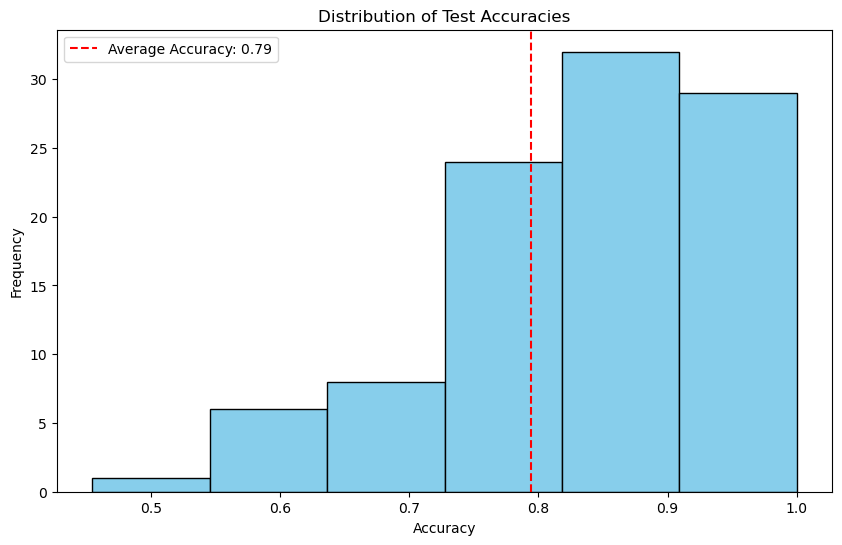

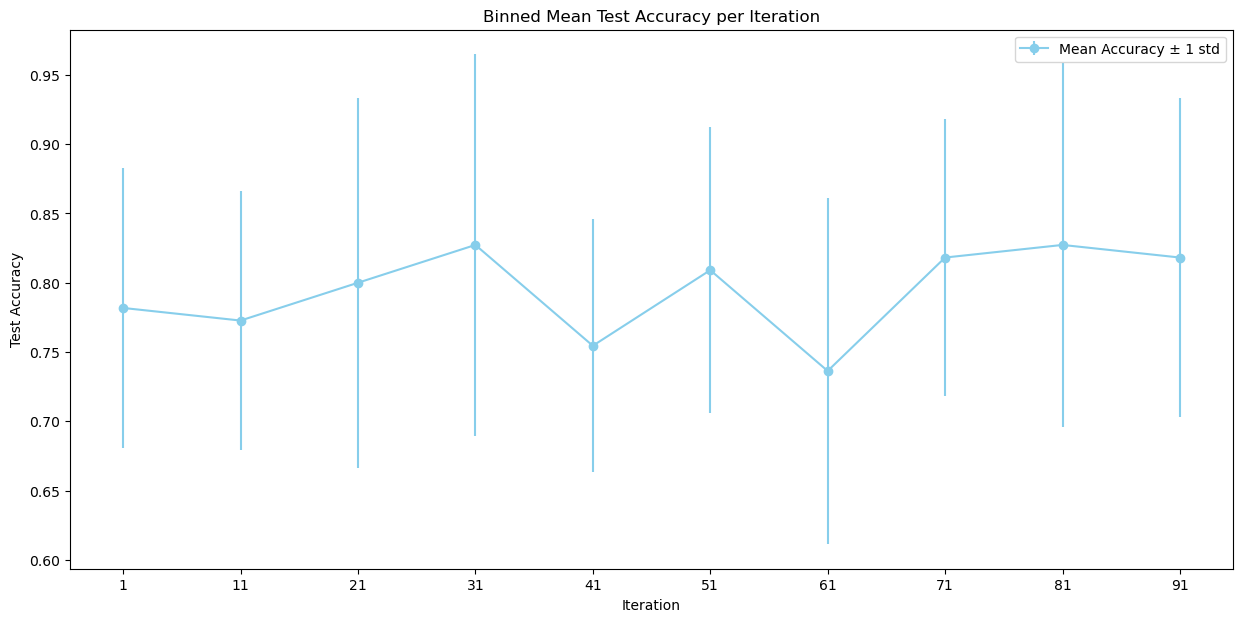

In [65]:
control_df = pd.read_csv("Control_db.csv")
dementia_df = pd.read_csv("Dementia_db.csv")

df = pd.concat([control_df, dementia_df], ignore_index=True)
test_accuracies = []

for i in range(100):
    df = df.sample(frac=1)

    X_train, X_test, y_train, y_test = train_test_split(
        df['Transcript'],
        df['Category'],
        test_size=0.1,
        random_state=42
    )

    tfidf_vectorizer = TfidfVectorizer(max_features=50, min_df=3, max_df=0.7)
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_tfidf, y_train)

    test_predictions = model.predict(X_test_tfidf)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_accuracies.append(test_accuracy)

average_accuracy = np.mean(test_accuracies)
std_dev_accuracy = np.std(test_accuracies)

plt.figure(figsize=(10, 6))
plt.hist(test_accuracies, bins=6, color='skyblue', edgecolor='black')
plt.axvline(x=average_accuracy, color='red', linestyle='--', label=f'Average Accuracy: {average_accuracy:.2f}')
plt.title('Distribution of Test Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

bin_size = 10
binned_means = [np.mean(test_accuracies[i:i+bin_size]) for i in range(0, 100, bin_size)]
binned_stds = [np.std(test_accuracies[i:i+bin_size]) for i in range(0, 100, bin_size)]

plt.figure(figsize=(15, 7))
plt.errorbar(x=np.arange(1, 101, bin_size), y=binned_means, yerr=binned_stds, fmt='o-', color='skyblue', label='Mean Accuracy ± 1 std')
plt.title('Binned Mean Test Accuracy per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Test Accuracy')
plt.xticks(np.arange(1, 101, bin_size))
plt.legend()
plt.show()


# ML model : KNeighborsClassifier

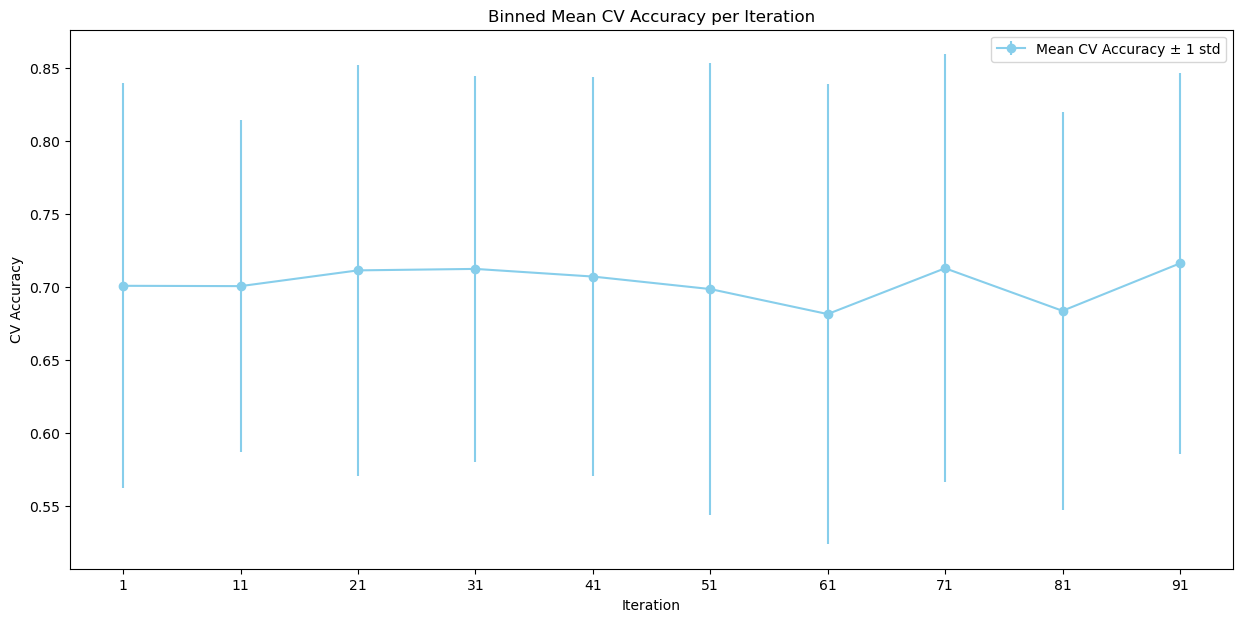

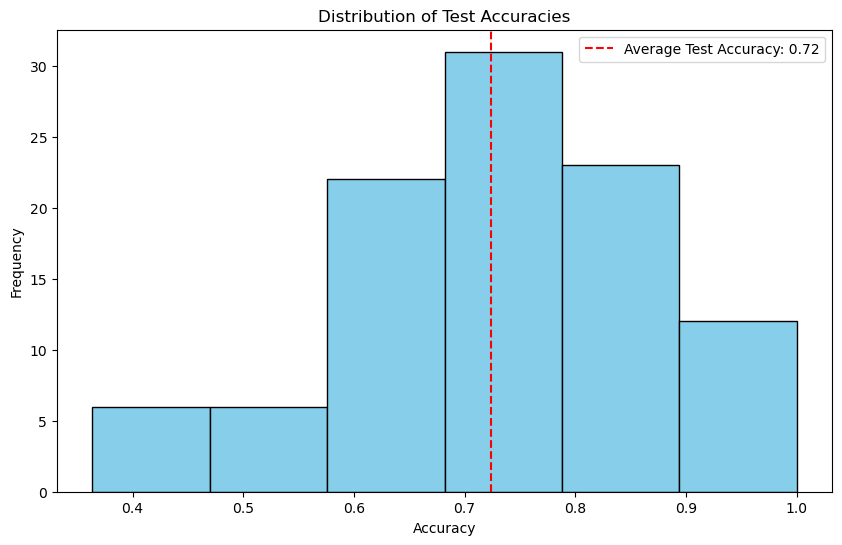

In [3]:
warnings.simplefilter(action='ignore', category=FutureWarning)

control_df = pd.read_csv("Control_db.csv")
dementia_df = pd.read_csv("Dementia_db.csv")

df = pd.concat([control_df, dementia_df], ignore_index=True)
test_accuracies = []
all_cv_scores = []

for i in range(100):  
    df = df.sample(frac=1)
    X_train, X_test, y_train, y_test = train_test_split(
        df['Transcript'],
        df['Category'],
        test_size=0.1,
        random_state=42
    )

    tfidf_vectorizer = TfidfVectorizer(max_features=50, min_df=3, max_df=0.7)
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    model = KNeighborsClassifier(n_neighbors=5)
    cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=10)
    all_cv_scores.append(cv_scores)
    model.fit(X_train_tfidf, y_train)

    test_predictions = model.predict(X_test_tfidf)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_accuracies.append(test_accuracy)

all_cv_scores = np.array(all_cv_scores)  

bin_size = 10  # Group every 10 iterations
binned_means = [np.mean(all_cv_scores[i:i+bin_size]) for i in range(0, 100, bin_size)]
binned_stds = [np.std(all_cv_scores[i:i+bin_size]) for i in range(0, 100, bin_size)]

plt.figure(figsize=(15, 7))
plt.errorbar(x=np.arange(1, 101, bin_size), y=binned_means, yerr=binned_stds, fmt='o-', color='skyblue', label='Mean CV Accuracy ± 1 std')
plt.title('Binned Mean CV Accuracy per Iteration')
plt.xlabel('Iteration')
plt.ylabel('CV Accuracy')
plt.xticks(np.arange(1, 101, bin_size)) 
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(test_accuracies, bins=6, color='skyblue', edgecolor='black')
plt.axvline(x=np.mean(test_accuracies), color='red', linestyle='--', label=f'Average Test Accuracy: {np.mean(test_accuracies):.2f}')
plt.title('Distribution of Test Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

